In [1]:
pip install bm3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.0/862.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.4 MB/s eta 0:00:00


The authors, Ymir Mäkinen, Lucio Azzari, and Alessandro Foi, of the paper who introduced bm3d also wrote the bm3d library which we use here.

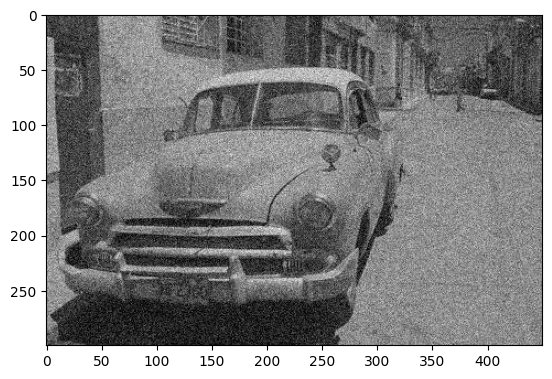

In [2]:
import bm3d # after installing, just import bm3d
import matplotlib.pyplot as plt # matplotlib is really helpful

noisy_image = plt.imread("/content/phpaQcVXp.png") # read the noisy image from local
plt.imshow(noisy_image, cmap='gray') # check out the image. cmap='gray' is important otherwise default imshow() colorizes the image by applying a colormap

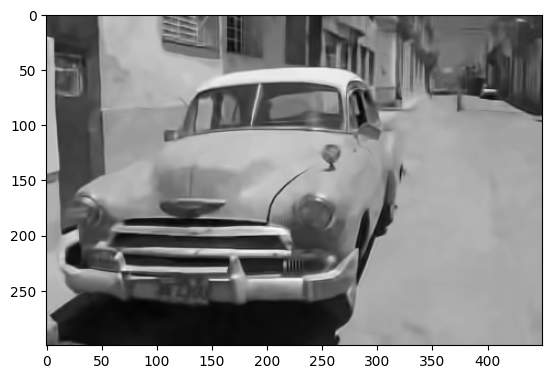

In [3]:
bm3d_image = bm3d.bm3d(noisy_image,sigma_psd=0.1,stage_arg=bm3d.BM3DStages.ALL_STAGES)
plt.imshow(bm3d_image, cmap='gray')

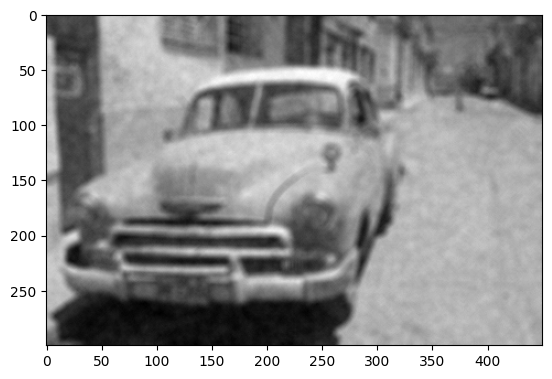

In [39]:
import cv2 # we can use OpenCV for the filters
import numpy as np
from scipy.ndimage import median_filter
from scipy.ndimage import uniform_filter

# applying a gaussian filter, it wont preserve structural information but will denoise the image
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 100)

# uniform filter is just the mean filter
mean_filtered = uniform_filter(noisy_image, size=5)

# median filters are used for high frequency, scattered noise and not really for gaussian noise but we can see the output anyway
median_filtered = median_filter(noisy_image, size=5)

# this is the closest thing to bm3d as it also preserves edges
bilateral_filtered = cv2.bilateralFilter(noisy_image, d=8, sigmaColor=125, sigmaSpace=50)

plt.imshow(bilateral_filtered, cmap='gray')

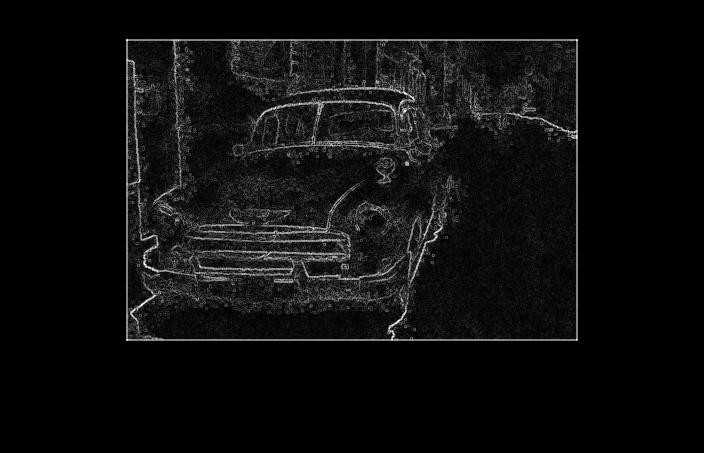

0

In [46]:
import cv2 as cv

def main():
    # Change 'your_image_filename.png' to the filename of the uploaded image
    image_path = '/content/maenshift85050.png'

    window_name = 'Sobel Demo - Simple Edge Detector'
    scale = 1
    delta = 0
    ddepth = cv.CV_16S

    # Load the image
    src = cv.imread(image_path, cv.IMREAD_COLOR)

    # Check if the image is loaded fine
    if src is None:
        print('Error opening image: ' + image_path)
        return -1

    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

    # Sobel operations
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    # Display image (for Colab, we'll use cv_imshow instead)
    from google.colab.patches import cv2_imshow
    cv2_imshow(grad)

    return 0

main()